# Introduction to Pandas

Tamás Gál (tamas.gal@fau.de)

The latest version of this notebook is available at [https://github.com/Asterics2020-Obelics](https://github.com/Asterics2020-Obelics/School2019/tree/master/pandas)

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib as ml
import sys
plt = ml.pyplot
ml.rcParams['figure.figsize'] = (10.0, 5.0)

print("Python version: {0}\n"
      "Pandas version: {1}\n"
      "Matplotlib version: {2}"
      .format(sys.version, pd.__version__, ml.__version__))

Python version: 3.7.2 (default, Feb 25 2019, 13:21:17) 
[Clang 10.0.0 (clang-1000.10.44.4)]
Pandas version: 0.24.2
Matplotlib version: 3.0.3


In [2]:
from IPython.core.magic import register_line_magic

@register_line_magic
def shorterr(line):
    """Show only the exception message if one is raised."""
    try:
        output = eval(line)
    except Exception as e:
        print("\x1b[31m\x1b[1m{e.__class__.__name__}: {e}\x1b[0m".format(e=e))
    else:
        return output
    
del shorterr

## The basic data structures in Pandas

### `DataFrame`

In [3]:
data = {'a': [1, 2, 3],
        'b': [4.1, 5.2, 6.3],
        'c': ['foo', 'bar', 'baz'],
        'd': 42}

In [4]:
df = pd.DataFrame(data)
df

,a,b,c,d
0,1,4.1,foo,42
1,2,5.2,bar,42
2,3,6.3,baz,42


In [5]:
type(df)

pandas.core.frame.DataFrame

### `Series`

In [6]:
df['a']

0    1
1    2
2    3
Name: a, dtype: int64

In [7]:
type(df['a'])  

pandas.core.series.Series

In [8]:
df['a'] * 23

0    23
1    46
2    69
Name: a, dtype: int64

In [9]:
np.cos(df['a'])

0    0.540302
1   -0.416147
2   -0.989992
Name: a, dtype: float64

In [10]:
s = pd.Series(np.random.randint(0, 10, 5))
s

0    6
1    1
2    1
3    7
4    8
dtype: int64

In [11]:
s.sort_values()  # indices are kept!

1    1
2    1
0    6
3    7
4    8
dtype: int64

In [12]:
s * s.sort_values()  # and are used to match elements

0    36
1     1
2     1
3    49
4    64
dtype: int64

In [13]:
s * s.sort_values().reset_index(drop=True)

0     6
1     1
2     6
3    49
4    64
dtype: int64

## Examining a `DataFrame`

In [14]:
df

,a,b,c,d
0,1,4.1,foo,42
1,2,5.2,bar,42
2,3,6.3,baz,42


In [15]:
df.dtypes

a      int64
b    float64
c     object
d      int64
dtype: object

In [16]:
df.columns

Index(['a', 'b', 'c', 'd'], dtype='object')

In [17]:
df.shape

(3, 4)

### Looking into the data

In [18]:
df.head(2)

,a,b,c,d
0,1,4.1,foo,42
1,2,5.2,bar,42


In [19]:
df.tail(2)

,a,b,c,d
1,2,5.2,bar,42
2,3,6.3,baz,42


In [20]:
df.describe()

,a,b,d
count,3.0,3.00,3.0
mean,2.0,5.20,42.0
std,1.0,1.10,0.0
min,1.0,4.10,42.0
25%,1.5,4.65,42.0
50%,2.0,5.20,42.0
75%,2.5,5.75,42.0
max,3.0,6.30,42.0


## Indexing and Slicing

There are different ways to index/slice data in pandas, which is a bit confusing at first.

In [21]:
df.loc

In [22]:
df.iloc

### Using `.loc[]`

This one treats the input as label or "row-name".

In [23]:
df.loc[2]

a      3
b    6.3
c    baz
d     42
Name: 2, dtype: object

In [24]:
df['b'].loc[2]

6.3

In [25]:
%shorterr df.loc[-1]

KeyError: -1


#### Accessing multiple rows/columns

In [26]:
df.loc[[1, 2], ['b', 'd']]

,b,d
1,5.2,42
2,6.3,42


In [27]:
df.loc[1:3, ['a']]

,a
1,2
2,3


### Using `.iloc[]`

In [28]:
df.iloc[2]

a      3
b    6.3
c    baz
d     42
Name: 2, dtype: object

In [29]:
df.iloc[-1]

a      3
b    6.3
c    baz
d     42
Name: 2, dtype: object

## Grouped operations

In [30]:
df = pd.DataFrame({'location' : ['Italy', 'France', 'Italy', 'Italy',
                                 'France', 'Italy', 'France', 'France'],
                   'detector' : ['ARCA_DU1', 'ORCA_DU2', 'ARCA_DU3', 'ARCA_DU4',
                                 'ANTARES', 'NEMO', 'ORCA_DU1', 'ORCA_DU5'],
                   'x' : np.random.randn(8),
                   'y' : np.random.randn(8)})
df

,location,detector,x,y
0,Italy,ARCA_DU1,-0.712803,-0.054307
1,France,ORCA_DU2,-1.200289,0.720308
2,Italy,ARCA_DU3,0.187570,0.971944
3,Italy,ARCA_DU4,-0.821992,0.982666
4,France,ANTARES,-0.045035,-0.481263
5,Italy,NEMO,-0.310877,0.842116
6,France,ORCA_DU1,-1.074703,0.327272
7,France,ORCA_DU5,-0.104707,1.772923


In [31]:
df.groupby(['location']).groups

{'France': Int64Index([1, 4, 6, 7], dtype='int64'),
 'Italy': Int64Index([0, 2, 3, 5], dtype='int64')}

In [32]:
df.groupby(['location']).get_group('France')

,location,detector,x,y
1,France,ORCA_DU2,-1.200289,0.720308
4,France,ANTARES,-0.045035,-0.481263
6,France,ORCA_DU1,-1.074703,0.327272
7,France,ORCA_DU5,-0.104707,1.772923


In [33]:
df = pd.DataFrame({
    'event_id': [1, 1, 1, 2, 2, 3, 3, 3, 3],
    'n_hits': [23, 13, 14, 44, 23, 45, 1, 2, 4]
})
df

,event_id,n_hits
0,1,23
1,1,13
2,1,14
3,2,44
4,2,23
5,3,45
6,3,1
7,3,2
8,3,4


In [34]:
df.groupby('event_id')

In [35]:
for name, group_data in df.groupby('event_id'):
    print("Group name: {0}".format(name))
    print(group_data, "\n")

Group name: 1
   event_id  n_hits
0         1      23
1         1      13
2         1      14 

Group name: 2
   event_id  n_hits
3         2      44
4         2      23 

Group name: 3
   event_id  n_hits
5         3      45
6         3       1
7         3       2
8         3       4 



In [36]:
df.groupby('event_id').aggregate([np.mean, np.median, sum, min, max])

n_hits                   
               mean median sum min max
event_id                              
1         16.666667   14.0  50  13  23
2         33.500000   33.5  67  23  44
3         13.000000    3.0  52   1  45

## Plotting

In [37]:
df = pd.DataFrame({'foo': np.cumsum(np.random.random(1000) - 0.5),
                   'bar': np.cumsum(np.random.random(1000) - 0.5),
                   'narf': np.cumsum(np.random.random(1000) - 0.5)})

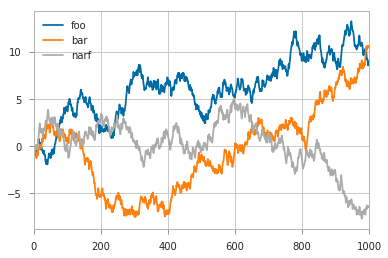

In [38]:
df.plot();

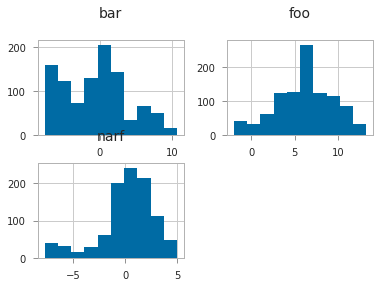

In [39]:
df.hist();

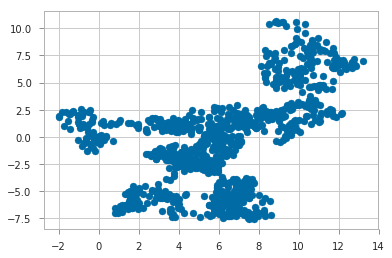

In [40]:
plt.scatter(df['foo'], df['bar']);

## Acknowledgements
![](images/eu_asterics.png)

This tutorial was supported by the H2020-Astronomy ESFRI and Research Infrastructure Cluster (Grant Agreement number: 653477).